In [1]:
#Import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as figure
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn import preprocessing
import math
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Reading the file
Training_Data = pd.read_csv("train.csv")


# Studying the data

In [3]:
Training_Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
Training_Data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
Training_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
Training_Data.shape

(10886, 12)

In [7]:
Training_Data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
Training_Data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
#Converting Datetime and taking the data we need out of it
def convert_date(dataframe):
    dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
    dataframe['month'] = dataframe['datetime'].dt.month
    dataframe['hour'] = dataframe['datetime'].dt.hour
    dataframe['weekday'] = dataframe['datetime'].dt.dayofweek
    dataframe["day"]=dataframe["datetime"].dt.day
    dataframe["year"]=dataframe["datetime"].dt.year
    return dataframe
#Dropping the columns we don't need in our model
def Dropping(Data):
    #Dropping casual and registerd cause their sum equals the count and the count is our targert variable
    #Dropping datetime after I converted it and took The data I need from it
    #There is a correlation between temp and atemp so we have to drop one of them
    #There is also a correlation between the season and the month so we need to drop on of them
    Data=Data.drop(['datetime','casual','registered','atemp','month','year'],axis=1)
    return Data
def plot_category_with_user_type(category,Target_Variable): 
        fig, ax = plt.subplots(1, figsize=(10,10), sharey=True)
        fig.suptitle("User Distribution According To " + category, fontsize=14)
        sns.barplot(x = category, y = Target_Variable['count'], data = Training_Data, ax = ax)
        fig.show()

In [10]:
#Converting the datetime into a pd dataframe and then taking the data we need out of it
Training_Data=convert_date(Training_Data)

In [11]:
Training_Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5,1,2011


# Finding the correlations between the data

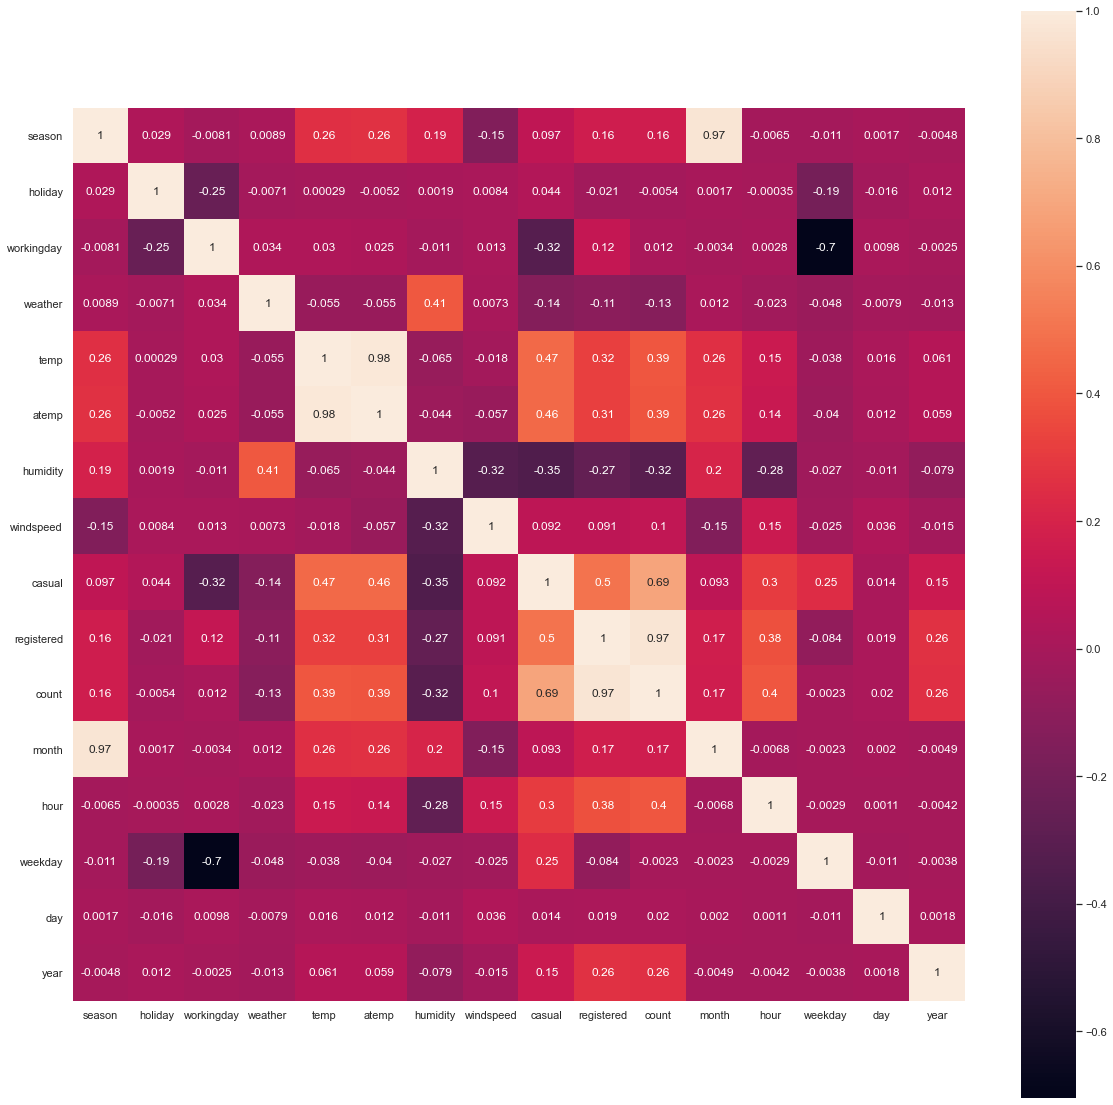

In [12]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(Training_Data.corr(),annot=True,square=True)

In [13]:
#Proving that registered + casual = the count by creating a new data frame that holds two columns one for 
#registered+ count and the other is count and finding the correlation between them
NewColumn=[]
for (casual,registered,count) in zip(Training_Data["casual"],Training_Data["registered"],Training_Data["count"]):
    NewColumn.append([casual+registered,count])

In [14]:
df = pd.DataFrame(NewColumn, columns=['Registerd+casual', 'count'])
df.corr()
#As you can see from the output of corr function you would notice the value of the correlation is 1.0
#as a conclusion that registered and casual sum is the same as the count and count is our target variable
#we need to drop these two columns

,Registerd+casual,count
Registerd+casual,1.0,1.0
count,1.0,1.0


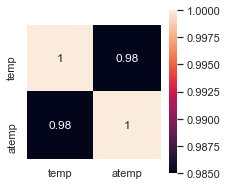

In [15]:
fig = plt.figure(figsize=[3,3])
ax = sns.heatmap(Training_Data[["temp","atemp"]].corr(),annot=True,square=True)
#as we can see here there is a correlation of 98% between temp and atemp so 
#we have to dorp one of them preferably atemp cause temp is more accurate

Dropping unnecesary coulmns and saving the target varaible


In [16]:
Training_Data=Dropping(Training_Data)

Here we will be observing the heatmap after getting rid of the correlations.



We will also drop some columns that we don't need in our modle

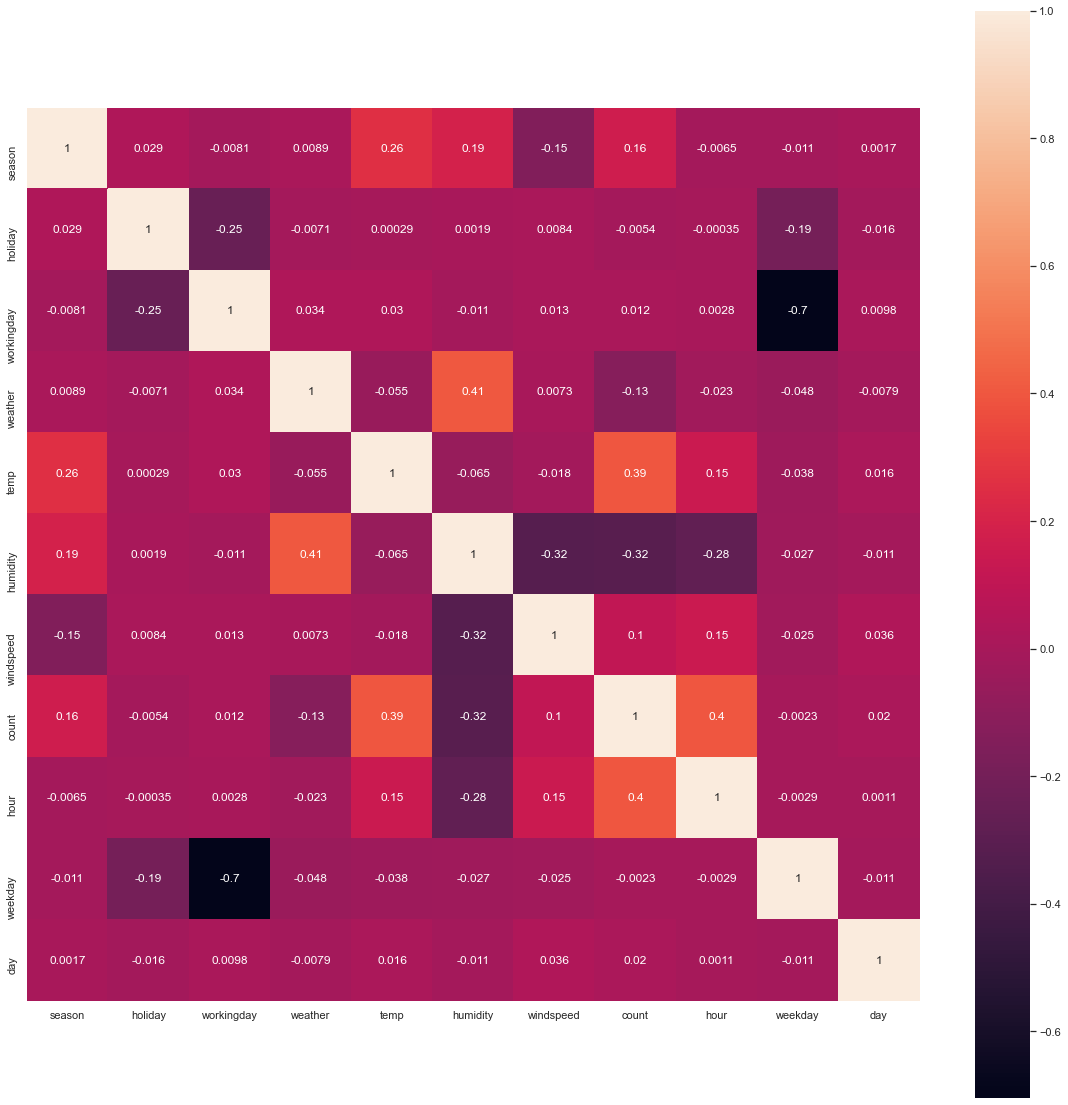

In [17]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(Training_Data.corr(),annot=True,square=True)

In [18]:
#Dropping workday, holiday and weekday because they are weakly correlated to the target variable
Training_Data.drop(['workingday','weekday','holiday'], axis=1 , inplace=True)

In [19]:
Training_Data.isnull().sum()

season       0
weather      0
temp         0
humidity     0
windspeed    0
count        0
hour         0
day          0
dtype: int64

<AxesSubplot:>

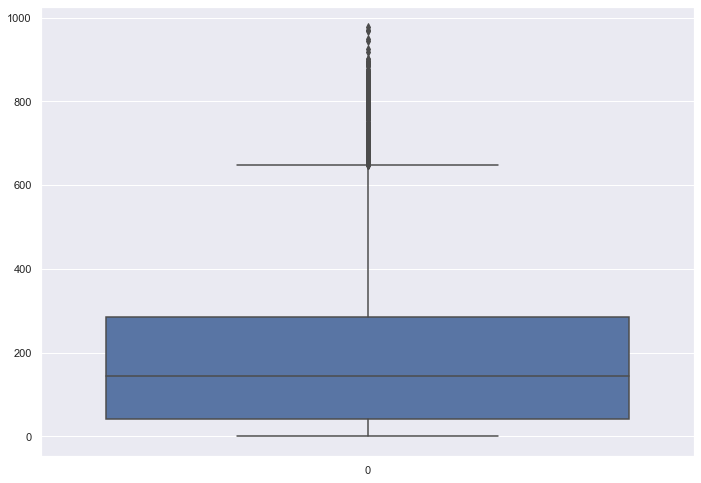

In [20]:
#Testing and boxbloting column to check for outliers
sns.boxplot(data=Training_Data['count'])

In [21]:
Training_Data.shape

(10886, 8)

# Getting rid of the outliers using percentile technique

In [22]:
Training_Data.nunique()

season         4
weather        4
temp          49
humidity      89
windspeed     28
count        822
hour          24
day           19
dtype: int64

In [23]:
for column in Training_Data[['temp','humidity','windspeed','count']]:
    for x in [column]:
        q75,q25 = np.percentile(Training_Data.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        Training_Data.loc[Training_Data[x] < min,x] = np.nan
        Training_Data.loc[Training_Data[x] > max,x] = np.nan

In [24]:
Training_Data.isnull().sum()


season         0
weather        0
temp           0
humidity      22
windspeed    227
count        300
hour           0
day            0
dtype: int64

In [25]:
Training_Data = Training_Data.dropna(axis = 0)

Before we take the target variable and drop it out of the training data set we have to normalize all the features

In [26]:
normalized_df=(Training_Data-Training_Data.min())/(Training_Data.max()-Training_Data.min())
normalized_X=pd.DataFrame(normalized_df)
normalized_X.reset_index(inplace=True)
normalized_X.drop('index',axis=1,inplace=True)
normalized_X

,season,weather,temp,humidity,windspeed,count,hour,day
0,0.0,0.0,0.224490,0.793478,0.000000,0.023220,0.000000,0.0
1,0.0,0.0,0.204082,0.782609,0.000000,0.060372,0.043478,0.0
2,0.0,0.0,0.204082,0.782609,0.000000,0.047988,0.086957,0.0
3,0.0,0.0,0.224490,0.728261,0.000000,0.018576,0.130435,0.0
4,0.0,0.0,0.224490,0.728261,0.000000,0.000000,0.173913,0.0
...,...,...,...,...,...,...,...,...
10343,1.0,0.0,0.367347,0.456522,0.838772,0.518576,0.826087,1.0
10344,1.0,0.0,0.346939,0.532609,0.483899,0.371517,0.869565,1.0
10345,1.0,0.0,0.326531,0.576087,0.483899,0.258514,0.913043,1.0
10346,1.0,0.0,0.326531,0.576087,0.193646,0.198142,0.956522,1.0


<AxesSubplot:>

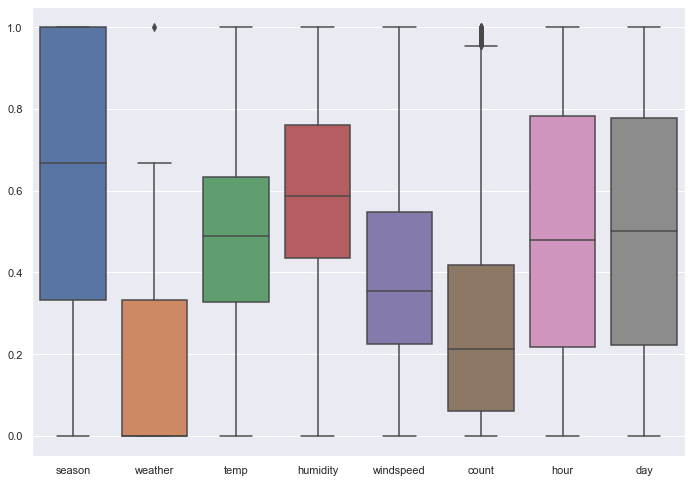

In [27]:
sns.boxplot(data=normalized_X)

In [28]:
temp = normalized_X['count']
Target_Variable=pd.DataFrame(temp)
normalized_X.drop('count', axis=1 , inplace=True)

<AxesSubplot:>

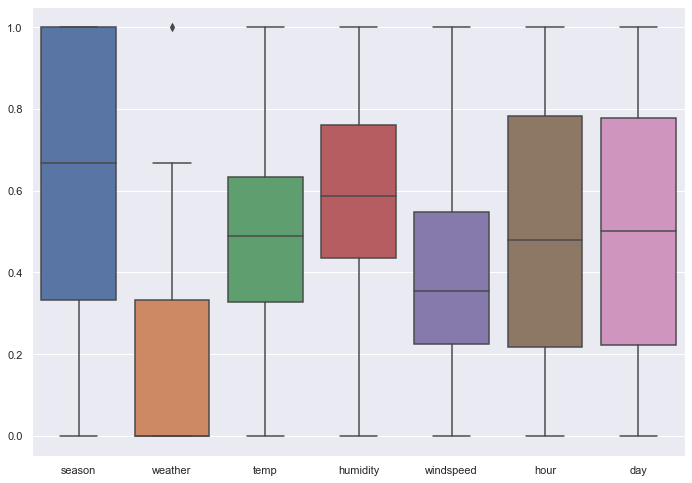

In [29]:
sns.boxplot(data=normalized_X)

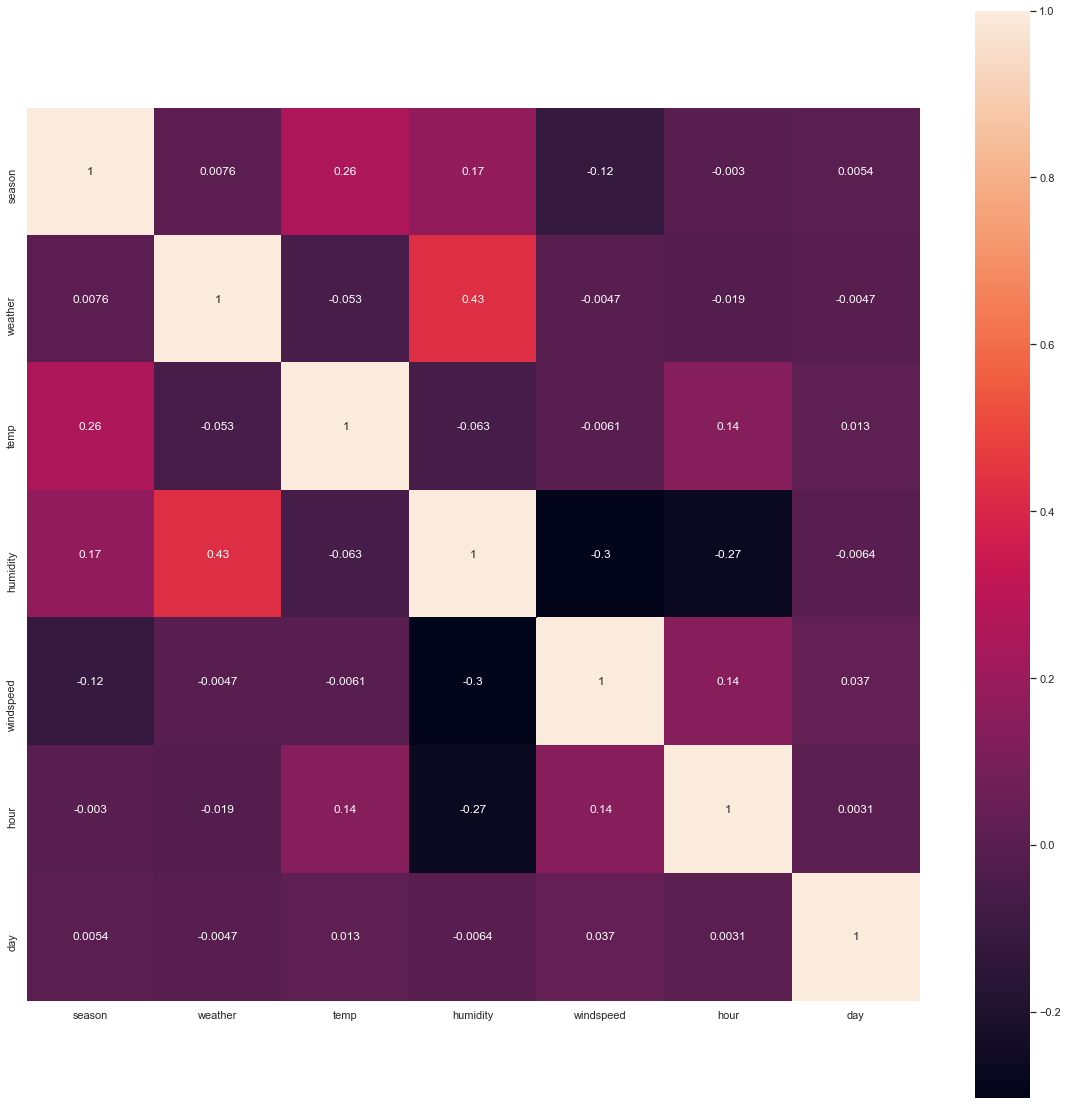

In [30]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(normalized_X.corr(),annot=True,square=True)

In [31]:
normalized_X.head()

,season,weather,temp,humidity,windspeed,hour,day
0,0.0,0.0,0.224490,0.793478,0.0,0.000000,0.0
1,0.0,0.0,0.204082,0.782609,0.0,0.043478,0.0
2,0.0,0.0,0.204082,0.782609,0.0,0.086957,0.0
3,0.0,0.0,0.224490,0.728261,0.0,0.130435,0.0
4,0.0,0.0,0.224490,0.728261,0.0,0.173913,0.0


# Analysing the final relations between the target variable and the other features

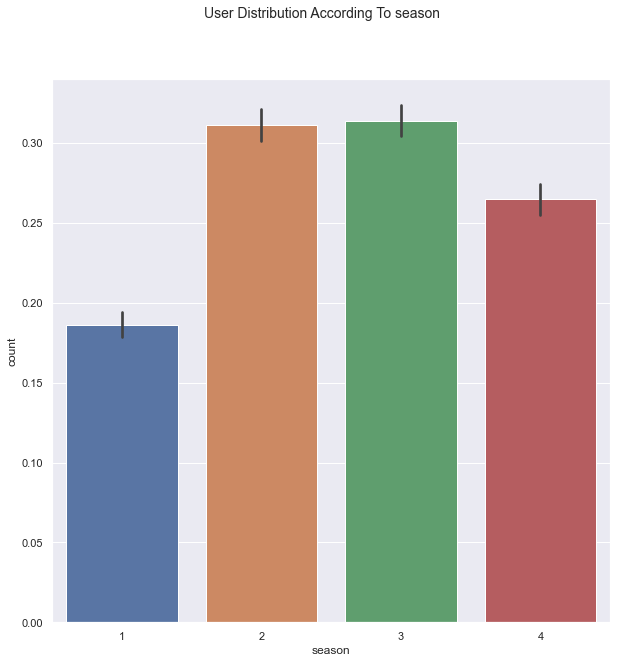

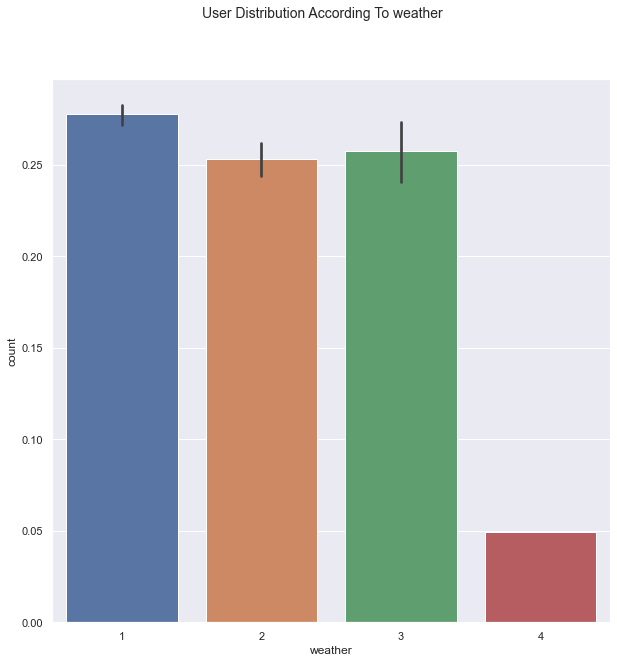

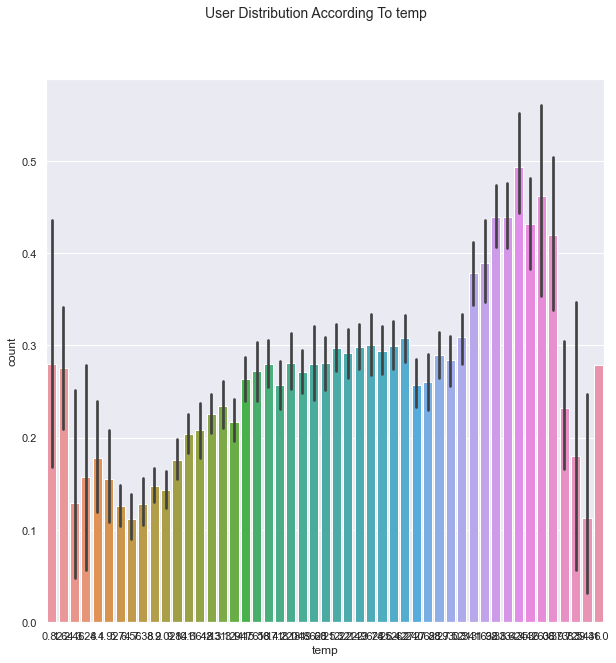

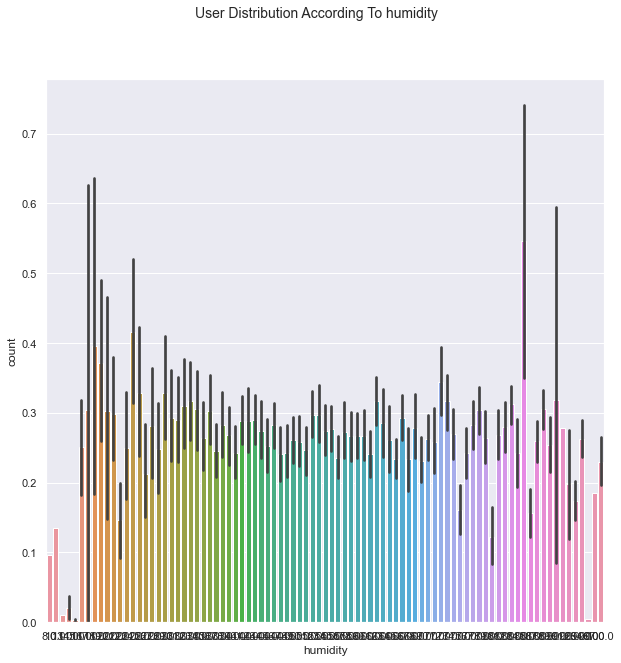

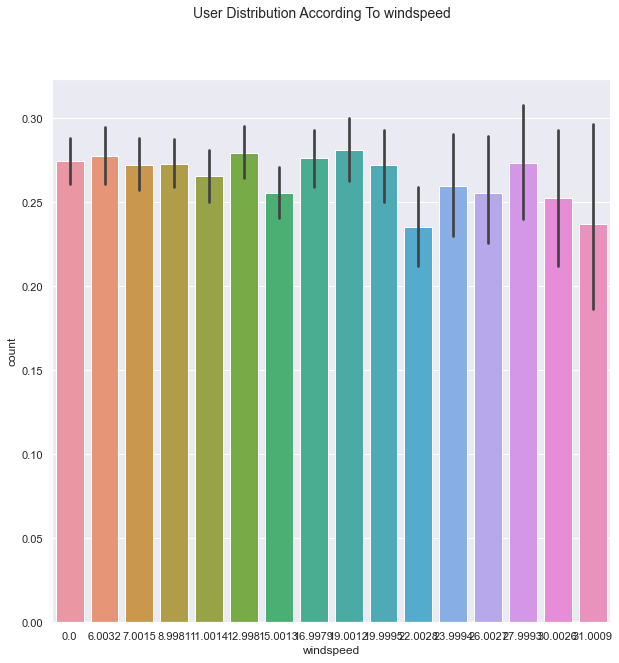

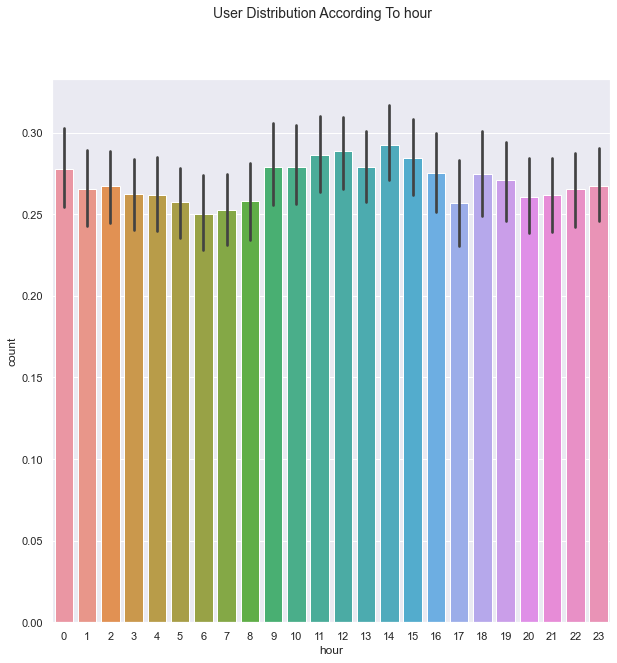

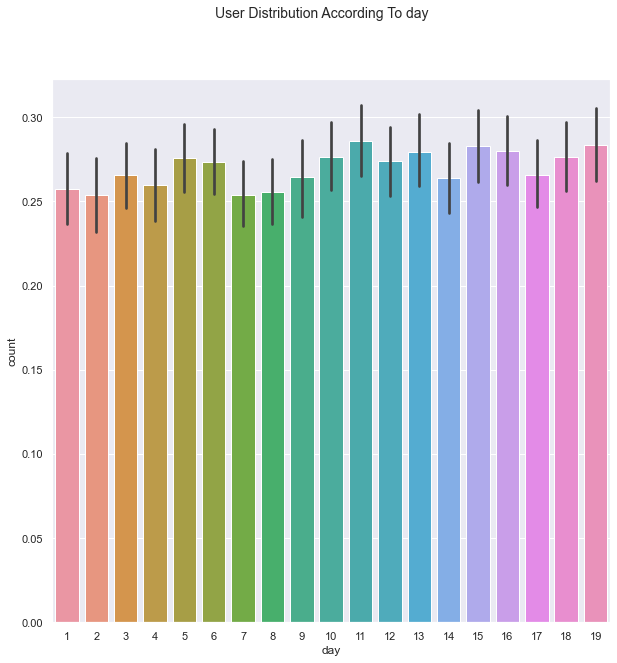

In [32]:
for category in normalized_X:
    category=plot_category_with_user_type(category,Target_Variable)

# Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


#I concluded the next equation form this



Input = [('scale', StandardScaler()), ('polynomial',PolynomialFeatures(degree=2),('mode',LinearRegression()))]


Pipe = Pipeline(Input)


Pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y)

In [34]:
Pipe = make_pipeline(Normalizer(),PolynomialFeatures(degree=2),LinearRegression())
Pipe.fit(normalized_X,Target_Variable)

Pipeline(steps=[('normalizer', Normalizer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

# Saving the model using pickle method

In [35]:
import pickle
pickle.dump(Pipe, open('model.sav', 'wb'))